In [1]:
#Capstone Project - IOD Dec 2020 - Fraser Stark - Data Cleaning

In [2]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

import warnings
warnings.filterwarnings("ignore")



from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv("Edinburgh Listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,15420,https://www.airbnb.com/rooms/15420,2.020100e+13,22/10/2020,Georgian Boutique Apt City Centre,"Stunning, impeccably refurbished spacious grou...","The neighbourhood is in the historic New Town,...",https://a0.muscache.com/pictures/cf69631f-4194...,60423,https://www.airbnb.com/users/show/60423,...,10.0,10.0,10.0,NaN,f,1,1,0,0,2.84
1,38628,https://www.airbnb.com/rooms/38628,2.020100e+13,22/10/2020,Edinburgh Holiday Let,Brunstane - Daiches Braes (close to Portobello...,Quiet and easy access to outside.,https://a0.muscache.com/pictures/d9885120-178e...,165635,https://www.airbnb.com/users/show/165635,...,10.0,10.0,10.0,NaN,t,2,2,0,0,0.72
2,44009,https://www.airbnb.com/rooms/44009,2.020100e+13,23/10/2020,"Very Spacious, Well Lit, Double Room, Very Cen...","Imagine living in a beautiful, well lit, very ...",The flat is very central. It is 2mins from the...,https://a0.muscache.com/pictures/35cda67b-f2a0...,192586,https://www.airbnb.com/users/show/192586,...,9.0,9.0,9.0,NaN,f,1,0,1,0,0.31
3,54188,https://www.airbnb.com/rooms/54188,2.020100e+13,22/10/2020,The Four Sisters Boatel,"A first for Scotland, The Four Sisters Boatel ...",The Four Sisters Boatel Is moored in The Lochr...,https://a0.muscache.com/pictures/11251d67-980e...,253850,https://www.airbnb.com/users/show/253850,...,9.0,10.0,9.0,NaN,t,1,1,0,0,0.31
4,55881,https://www.airbnb.com/rooms/55881,2.020100e+13,23/10/2020,Lovely central apartment sleeps 6,Lovely characterful Victorian tenement apartme...,NaN,https://a0.muscache.com/pictures/84332374/f268...,264345,https://www.airbnb.com/users/show/264345,...,10.0,10.0,10.0,NaN,f,1,1,0,0,2.16


In [4]:
df.tail()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6551,45954491,https://www.airbnb.com/rooms/45954491,2.020100e+13,22/10/2020,Triple room-Budget-Private Bathroom-Street Vie...,Edinburgh Holiday Guest House is located at Ne...,Edinburgh Holiday Guest House is located at Ne...,https://a0.muscache.com/pictures/1cc79dbf-937c...,372306305,https://www.airbnb.com/users/show/372306305,...,NaN,NaN,NaN,NaN,t,5,0,5,0,NaN
6552,45954492,https://www.airbnb.com/rooms/45954492,2.020100e+13,23/10/2020,Family room-Deluxe-Ensuite-Mountain View,Edinburgh Holiday Guest House is located at Ne...,Edinburgh Holiday Guest House is located at Ne...,https://a0.muscache.com/pictures/1cb7dfe5-3655...,372306305,https://www.airbnb.com/users/show/372306305,...,NaN,NaN,NaN,NaN,t,5,0,5,0,NaN
6553,45956096,https://www.airbnb.com/rooms/45956096,2.020100e+13,22/10/2020,Room with 3 beds close to edinburgh castle,NaN,NaN,https://a0.muscache.com/pictures/3f78fede-552b...,313086955,https://www.airbnb.com/users/show/313086955,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
6554,45967573,https://www.airbnb.com/rooms/45967573,2.020100e+13,22/10/2020,Longterm Two Bedroom Apartment sleeping 5 persons,Ocean Serviced Apartments offer a Two Bedroom ...,There is a 24 hour Asda located within 5 minut...,https://a0.muscache.com/pictures/9209b497-70f4...,2989965,https://www.airbnb.com/users/show/2989965,...,NaN,NaN,NaN,NaN,t,6,4,0,0,NaN
6555,45967810,https://www.airbnb.com/rooms/45967810,2.020100e+13,22/10/2020,Lovely room close to city centre.,"Lovely room in the vintage house, located on t...",NaN,https://a0.muscache.com/pictures/e5fae4a0-ef40...,262945149,https://www.airbnb.com/users/show/262945149,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


In [5]:
df.info

<bound method DataFrame.info of             id                            listing_url     scrape_id  \
0        15420     https://www.airbnb.com/rooms/15420  2.020100e+13   
1        38628     https://www.airbnb.com/rooms/38628  2.020100e+13   
2        44009     https://www.airbnb.com/rooms/44009  2.020100e+13   
3        54188     https://www.airbnb.com/rooms/54188  2.020100e+13   
4        55881     https://www.airbnb.com/rooms/55881  2.020100e+13   
...        ...                                    ...           ...   
6551  45954491  https://www.airbnb.com/rooms/45954491  2.020100e+13   
6552  45954492  https://www.airbnb.com/rooms/45954492  2.020100e+13   
6553  45956096  https://www.airbnb.com/rooms/45956096  2.020100e+13   
6554  45967573  https://www.airbnb.com/rooms/45967573  2.020100e+13   
6555  45967810  https://www.airbnb.com/rooms/45967810  2.020100e+13   

     last_scraped                                               name  \
0      22/10/2020                  Georgian

In [6]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [7]:
df.shape

(6556, 74)

In [8]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.556000e+03,6.556000e+03,6.556000e+03,6556.000000,6556.000000,0.0,6556.000000,6556.000000,6556.000000,0.0,...,5661.000000,5662.000000,5660.000000,5660.000000,0.0,6556.000000,6556.000000,6556.000000,6556.000000,5744.000000
mean,2.384449e+07,2.020100e+13,9.728766e+07,12.491916,12.491916,NaN,55.950681,-3.198529,3.584655,NaN,...,9.820880,9.822324,9.733392,9.509364,NaN,5.790116,4.377669,1.211714,0.039048,1.745569
std,1.299136e+07,0.000000e+00,9.607677e+07,68.041109,68.041109,NaN,0.015844,0.037933,2.134959,NaN,...,0.593006,0.608957,0.590118,0.736366,NaN,15.916847,14.851612,3.606041,0.526637,1.803153
min,1.542000e+04,2.020100e+13,3.629800e+04,0.000000,0.000000,NaN,55.858160,-3.418760,1.000000,NaN,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.379168e+07,2.020100e+13,1.890482e+07,1.000000,1.000000,NaN,55.942638,-3.212568,2.000000,NaN,...,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.400000
50%,2.442716e+07,2.020100e+13,5.941581e+07,2.000000,2.000000,NaN,55.951315,-3.193695,3.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,1.130000
75%,3.532945e+07,2.020100e+13,1.551960e+08,4.000000,4.000000,NaN,55.960283,-3.178138,4.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,2.000000,1.000000,0.000000,2.562500
max,4.596781e+07,2.020100e+13,3.723080e+08,1490.000000,1490.000000,NaN,55.991560,-3.078950,16.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,113.000000,105.000000,39.000000,10.000000,31.030000


In [9]:
df.describe(include=['O'])

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
count,6556,6556,6556,6446,4994,6556,6556,6556,6556,6538,...,6556,6556,6548,6556,6556,6556,6556,5744,5744,6556
unique,6556,4,6482,6229,4439,6479,4379,1874,2215,368,...,48,4,29,6278,491,1,4,1779,716,2
top,https://www.airbnb.com/rooms/4801687,22/10/2020,Mono Suites - One Bedroom Suite,If you're trying to find the perfectly located...,Eating Out: <br />A good selection of cafes an...,https://a0.muscache.com/pictures/882915e8-6ded...,https://www.airbnb.com/users/show/37563463,Altido,5/07/2015,"Edinburgh, Scotland, United Kingdom",...,Entire apartment,Entire home/apt,1 bath,"[""Elevator"", ""Long term stays allowed"", ""Bed l...",$50.00,t,22/10/2020,11/08/2019,1/01/2020,t
freq,1,2936,7,37,39,8,113,113,116,4591,...,3638,4213,3120,28,260,6556,2936,36,159,3659


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556 entries, 0 to 6555
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6556 non-null   int64  
 1   listing_url                                   6556 non-null   object 
 2   scrape_id                                     6556 non-null   float64
 3   last_scraped                                  6556 non-null   object 
 4   name                                          6556 non-null   object 
 5   description                                   6446 non-null   object 
 6   neighborhood_overview                         4994 non-null   object 
 7   picture_url                                   6556 non-null   object 
 8   host_id                                       6556 non-null   int64  
 9   host_url                                      6556 non-null   o

In [11]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [12]:
df_data = df.replace('?',np.NAN) 
df_data.isnull().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
name                                              0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               812
Length: 74, dtype: int64

In [15]:


df.drop('host_verifications', axis=1, inplace=True)
df.drop('last_scraped', axis=1, inplace=True)
df.drop('host_url', axis=1, inplace=True)
df.drop('picture_url', axis=1, inplace=True)
df.drop('host_thumbnail_url', axis=1, inplace=True)
df.drop('host_picture_url', axis=1, inplace=True)
df.drop('calendar_updated', axis=1, inplace=True)
df.drop('license', axis=1, inplace=True)
df.drop('calculated_host_listings_count_shared_rooms', axis=1, inplace=True)
df.drop('calendar_last_scraped', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)
df.drop('description', axis=1, inplace=True)
df.drop('neighborhood_group_cleansed', axis=1, inplace=True)
df.drop('host_verifications', axis=1, inplace=True)
df.drop('host_response_time', axis=1, inplace=True)
df.drop('host_response_rate', axis=1, inplace=True)
df.drop('host_acceptance_rate', axis=1, inplace=True)
df.drop('host_acceptance_rate', axis=1, inplace=True)
df.drop('neighbourhood', axis=1, inplace=True)
df.drop('host_identity_verified', axis=1, inplace=True)


KeyError: "['host_verifications'] not found in axis"

In [16]:
df["review_scores_rating"] = df["review_scores_rating"].fillna(0)
df["bedrooms"] = df["bedrooms"].fillna(0)
df["beds"] = df["beds"].fillna(0)
df['review_scores_accuracy'] = df['review_scores_accuracy'].fillna(0)
df['review_scores_cleanliness'] = df['review_scores_cleanliness'].fillna(0)
df['review_scores_checkin'] = df['review_scores_checkin'].fillna(0)
df['review_scores_communication'] = df['review_scores_communication'].fillna(0)
df['review_scores_location'] = df['review_scores_location'].fillna(0)
df['review_scores_value'] = df['review_scores_value'].fillna(0)
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

In [17]:
df_data = df.replace('?',np.NAN) 
df_data.isnull().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
host_id                                         0
host_name                                       0
                                               ..
instant_bookable                                0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
reviews_per_month                               0
Length: 61, dtype: int64

In [18]:
df.room_type.value_counts(normalize=True)

Entire home/apt    0.642617
Private room       0.335876
Hotel room         0.016473
Shared room        0.005034
Name: room_type, dtype: float64

In [19]:
df.property_type.value_counts(normalize=True)

Entire apartment                      0.554912
Private room in apartment             0.193563
Private room in house                 0.062691
Entire house                          0.032337
Private room in townhouse             0.021507
Room in boutique hotel                0.017236
Entire condominium                    0.016779
Private room in bed and breakfast     0.012965
Entire townhouse                      0.009762
Private room in bungalow              0.007169
Room in hostel                        0.006864
Entire serviced apartment             0.006711
Private room in condominium           0.006254
Room in serviced apartment            0.006101
Entire guest suite                    0.004728
Entire cottage                        0.004423
Private room in guesthouse            0.003813
Room in aparthotel                    0.003813
Shared room in hostel                 0.003661
Entire loft                           0.002746
Room in hotel                         0.002135
Entire bungal

In [20]:
df[['price', 'bedrooms', 'accommodates']].head(3)

,price,bedrooms,accommodates
0,$67.00,1.0,2
1,$46.00,0.0,2
2,$45.00,1.0,2


In [21]:
# checking Nan's in "price" column
df.price.isna().sum()

0

In [22]:
df.price = df.price.str.replace('$', '').str.replace(',', '').astype(float)

In [23]:
df['price'].describe()

count     6556.000000
mean       133.891138
std        644.503053
min          0.000000
25%         45.105000
50%         70.000000
75%        106.000000
max      18905.000000
Name: price, dtype: float64

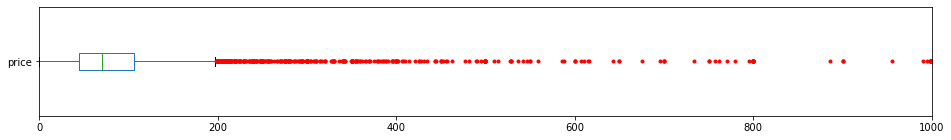

In [24]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
df['price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2));

In [25]:
df.drop(df[ (df.price > 600) | (df.price == 0) ].index, axis=0, inplace=True)

In [26]:
df['price'].describe()

count    6435.000000
mean       88.935089
std        71.136126
min         8.000000
25%        45.000000
50%        70.000000
75%       103.000000
max       600.000000
Name: price, dtype: float64

In [27]:
print("The dataset has {} rows and {} columns - after being price-wise preprocessed.".format(*df.shape))

The dataset has 6435 rows and 61 columns - after being price-wise preprocessed.


In [28]:
print("The dataset has {} rows and {} columns - after having dealt with missing values.".format(*df.shape))


The dataset has 6435 rows and 61 columns - after having dealt with missing values.


In [29]:
df.to_csv('Edinburgh Listings Cleaned.csv')